In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [16]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

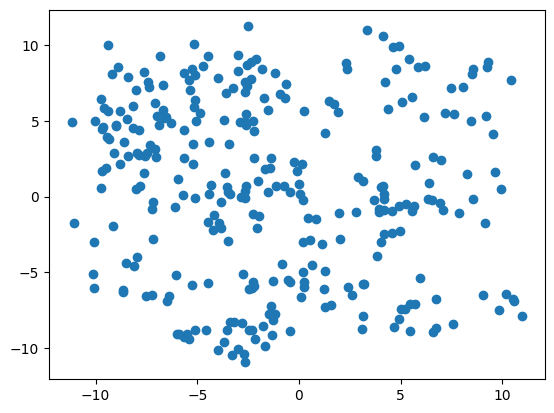

In [30]:
X, y_true = make_blobs(n_samples=300, centers=2, cluster_std=0.90, random_state=25)
plt.scatter(X[:, 0], X[:, 1])

In [13]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

c:\Users\ATISHAY SG\anaconda3\envs\AIMLSem1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]]
[0 2 3 2 0 0 1 3 2 2 1 2 3 2 0 3 3 0 1 1 0 0 3 1 1 3 0 3 1 3 2 2 3 2 2 2 2
 2 1 0 3 1 3 3 1 1 2 1 2 0 1 0 2 0 0 1 2 1 2 0 2 3 2 1 1 1 2 0 2 1 3 1 2 1
 1 2 1 3 0 2 0 3 0 0 2 3 0 3 2 2 3 0 2 1 1 3 0 0 3 1 2 0 2 0 3 0 0 3 2 3 1
 1 0 2 0 3 2 0 0 3 1 0 1 0 0 0 0 1 0 1 2 1 1 0 2 1 1 2 3 2 2 1 3 1 3 1 2 3
 2 2 2 3 2 3 0 1 2 1 0 3 2 3 3 0 3 1 1 3 0 3 3 2 0 3 1 2 0 0 3 1 0 3 1 1 3
 3 3 3 0 2 3 1 3 3 1 1 1 3 1 2 3 1 0 1 3 2 1 2 3 2 3 1 3 3 2 1 1 0 0 3 2 0
 0 1 0 1 3 2 2 3 3 2 3 0 1 3 0 1 2 1 0 3 0 2 2 2 2 1 1 2 3 1 0 3 1 1 1 0 0
 2 3 3 1 0 2 1 3 2 3 0 0 1 1 3 0 0 0 3 2 2 0 0 3 0 0 0 2 1 2 3 0 0 2 2 2 0
 0 3 2 1]


*********KMeans from Scratch*********

In [36]:
rnd = np.random.RandomState(42)
record_count = X.shape[0]
print(f"Record count is {record_count}")
all_indices = rnd.permutation(record_count)
all_indices

Record count is 300


array([203, 266, 152,   9, 233, 226, 196, 109,   5, 175, 237,  57, 218,
        45, 182, 221, 289, 211, 148, 165,  78, 113, 249, 250, 104,  42,
       281, 295, 157, 238,  17, 164,  33,  24, 215, 119,   7,  90,  46,
        73,  93,  76, 286,  60,  77,  63, 234, 229, 111, 231, 180, 144,
       239,  75, 297, 278,  97,  92, 192,  25, 232,  59,   6, 185, 173,
        30,  22, 256,  56, 186, 108, 126, 230, 193, 129, 282,  82,  84,
        66, 288, 163, 154,  19, 124,  79, 114, 118,  72,  15,  10, 194,
       101,  68, 224,  37,  16, 179, 147, 274,  67, 228,  69,  31, 183,
       265, 225, 140,  18, 181,  96, 132, 262,  86, 248, 245, 116, 146,
       292, 197, 206,  55, 172, 184, 167, 139, 253,  38, 125, 195, 283,
       137, 112, 168, 117, 277, 271, 155, 176, 178,   2, 115, 143, 177,
       120, 210, 260, 127,  74,  29,  83, 269, 107, 223, 158, 280, 246,
       222,  65, 198,  85, 213, 159,  12,  35,  28, 142, 284, 254, 170,
        51,  95, 208, 247,  41,  89, 244, 136,  26, 293, 141, 20

In [39]:
X[all_indices[: 4]]

array([[-9.68755302,  4.45538794],
       [-2.77255481, -5.08197923],
       [ 0.04642356,  0.14020008],
       [ 0.11733245, -6.61082925]])

In [45]:
def get_random_centroids(X, cluster_count):
    rnd = np.random.RandomState(42)
    record_count = X.shape[0]
    permutations = rnd.permutation(record_count)
    random_centroid_idx = permutations[:cluster_count]
    return X[random_centroid_idx]



In [46]:
num_clusters = 4
centroids = get_random_centroids(X, 4)
centroids

array([[-9.68755302,  4.45538794],
       [-2.77255481, -5.08197923],
       [ 0.04642356,  0.14020008],
       [ 0.11733245, -6.61082925]])

In [48]:
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin

In [50]:
blob_centroid_dists = pairwise_distances(X, centroids)
blob_centroid_dists

array([[ 8.31543302, 13.77843824,  8.93483621, 15.53311923],
       [ 0.58315613, 11.21208042, 10.22713296, 14.23225558],
       [ 3.26333583, 10.97025298,  8.30554202, 13.57232807],
       ...,
       [ 3.59536383,  8.18518625,  7.76866387, 11.21552747],
       [10.95318406, 10.08544195,  4.20087346, 10.83289473],
       [11.50875559, 12.02433886,  6.16454457, 12.78699684]])

In [52]:
np.argmin(blob_centroid_dists, axis = 1)

array([0, 0, 0, 0, 2, 2, 3, 0, 0, 3, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 3, 2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 3,
       1, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 2, 1, 0, 3, 3,
       0, 2, 3, 2, 2, 1, 0, 2, 2, 3, 2, 2, 1, 0, 0, 2, 0, 0, 2, 3, 2, 2,
       0, 3, 2, 3, 2, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 3, 0, 3, 2, 3, 3, 3, 3, 0, 2, 0, 2, 2, 2, 0, 1, 3, 1,
       0, 2, 2, 0, 1, 1, 3, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2, 2,
       2, 1, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 3, 3, 2, 0, 1, 2, 1, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 0, 1, 2, 3, 0, 1, 3, 1, 0, 3, 2, 1, 0, 2, 2, 2, 2, 0, 3, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 3, 2, 0, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 3, 3,
       3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 3, 0,
       0, 0, 1, 0, 3, 0, 2, 0, 3, 2, 2, 0, 2, 2], d

In [53]:
cluster_memberships = pairwise_distances_argmin(X, centroids)
cluster_memberships

array([0, 0, 0, 0, 2, 2, 3, 0, 0, 3, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 3, 2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 3,
       1, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 2, 1, 0, 3, 3,
       0, 2, 3, 2, 2, 1, 0, 2, 2, 3, 2, 2, 1, 0, 0, 2, 0, 0, 2, 3, 2, 2,
       0, 3, 2, 3, 2, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 3, 0, 3, 2, 3, 3, 3, 3, 0, 2, 0, 2, 2, 2, 0, 1, 3, 1,
       0, 2, 2, 0, 1, 1, 3, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2, 2,
       2, 1, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 3, 3, 2, 0, 1, 2, 1, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 0, 1, 2, 3, 0, 1, 3, 1, 0, 3, 2, 1, 0, 2, 2, 2, 2, 0, 3, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 3, 2, 0, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 3, 3,
       3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 3, 0,
       0, 0, 1, 0, 3, 0, 2, 0, 3, 2, 2, 0, 2, 2], d

In [55]:
cluster_memberships = 0

In [59]:
X[cluster_memberships == 0]

array([[[-2.53372207e+00,  8.69438891e+00],
        [-9.45663496e+00,  3.91989945e+00],
        [-6.51732136e+00,  5.22933368e+00],
        [-9.06952260e+00,  2.85546442e+00],
        [ 6.56685648e+00,  2.58981094e+00],
        [ 3.13225380e+00,  1.05553219e+00],
        [-2.17071223e+00, -9.39871030e+00],
        [-5.10405048e+00,  6.40216648e+00],
        [-9.65228300e+00,  4.57607113e+00],
        [ 1.17332451e-01, -6.61082925e+00],
        [-6.62209130e+00,  5.17015840e+00],
        [-4.40616300e+00,  3.58387088e+00],
        [ 8.47033775e+00,  4.97270246e+00],
        [-2.60955943e+00,  5.43992360e+00],
        [-5.05267203e+00,  4.98874743e+00],
        [ 2.32558035e+00,  8.83179170e+00],
        [-8.45031813e-01, -4.44808715e+00],
        [-1.27117178e+00, -5.58529863e+00],
        [-2.21616107e+00,  4.32312697e+00],
        [ 5.84343885e+00,  8.57765911e+00],
        [-2.66805818e+00,  6.88376925e+00],
        [-5.67890901e+00,  8.36710272e-02],
        [-7.52172090e+00, -6.549

In [63]:
clusters = [X[cluster_memberships == i] for i in range(0, num_clusters)] #list comprehension
clusters


[array([[[-2.53372207e+00,  8.69438891e+00],
         [-9.45663496e+00,  3.91989945e+00],
         [-6.51732136e+00,  5.22933368e+00],
         [-9.06952260e+00,  2.85546442e+00],
         [ 6.56685648e+00,  2.58981094e+00],
         [ 3.13225380e+00,  1.05553219e+00],
         [-2.17071223e+00, -9.39871030e+00],
         [-5.10405048e+00,  6.40216648e+00],
         [-9.65228300e+00,  4.57607113e+00],
         [ 1.17332451e-01, -6.61082925e+00],
         [-6.62209130e+00,  5.17015840e+00],
         [-4.40616300e+00,  3.58387088e+00],
         [ 8.47033775e+00,  4.97270246e+00],
         [-2.60955943e+00,  5.43992360e+00],
         [-5.05267203e+00,  4.98874743e+00],
         [ 2.32558035e+00,  8.83179170e+00],
         [-8.45031813e-01, -4.44808715e+00],
         [-1.27117178e+00, -5.58529863e+00],
         [-2.21616107e+00,  4.32312697e+00],
         [ 5.84343885e+00,  8.57765911e+00],
         [-2.66805818e+00,  6.88376925e+00],
         [-5.67890901e+00,  8.36710272e-02],
         [

In [64]:
len(clusters)

4

In [69]:
new_centroids = np.array([X[cluster_memberships == i].mean(axis=0) for i in range(0, num_clusters)])
new_centroids

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_6580\2589953753.py:1: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[cluster_memberships == i].mean(axis=0) for i in range(0, num_clusters)])
c:\Users\ATISHAY SG\anaconda3\envs\AIMLSem1\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


array([[[-2.53372207,  8.69438891],
        [-9.45663496,  3.91989945],
        [-6.51732136,  5.22933368],
        ...,
        [-7.59684056,  1.53039862],
        [ 1.26168637,  4.16145289],
        [ 1.70637848,  6.07704768]],

       [[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        ...,
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan]],

       [[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        ...,
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan]],

       [[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        ...,
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan]]])

In [ ]:
def kmeans(X, num_clusters=4):
    centroids = get_random_centroids(X, cluster_count=num_clusters)
    iter_idx = 1
    while True:
        print(f"Iter idx = {iter_idx}")
        cluster_memberships = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([C[cluster_memberships == i].mean(axis=0) for i in range(0, num_clusters)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
        iter_idx += 1
    return centroids, labels